In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



#enable horizantal scrolling
pd.set_option('display.width', None) 
pd.set_option('display.max_columns', None)

data = pd.read_csv(r"./data/housing.csv")
data.head(10)
        

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
# checking to see if we have any null values
data.info()
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity  

In [7]:
# #droping the null values and storing it on a new data frame
data_clean = data.dropna()
print(data_clean.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [8]:
# removing the median_house_value and set the x
# by setting axis=1, you're telling pandas to look for 'median_house_value' among the column labels and remove that entire column from the DataFrame.
x = data_clean.drop(['median_house_value'], axis=1)
y = data_clean['median_house_value']
# now we gonna select the test data so we can then evaluate our model
#notice we spliting the ther test data size to be 20% aka 0.2
#x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.2)
x_training, x_test, y_training, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [9]:
training_data = x_training.join(y_training)   
training_data.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
6823,-118.10,34.09,42.0,1460.0,289.0,829.0,273.0,4.8750,<1H OCEAN,227300.0
8384,-118.36,33.95,26.0,3231.0,1089.0,3193.0,1020.0,2.6535,<1H OCEAN,177200.0
2758,-115.49,32.67,29.0,1523.0,440.0,1302.0,393.0,1.1311,INLAND,84700.0
18143,-122.06,37.34,20.0,3435.0,593.0,1293.0,553.0,6.7578,<1H OCEAN,451400.0
15621,-122.41,37.80,52.0,2583.0,672.0,1335.0,613.0,3.1477,NEAR BAY,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

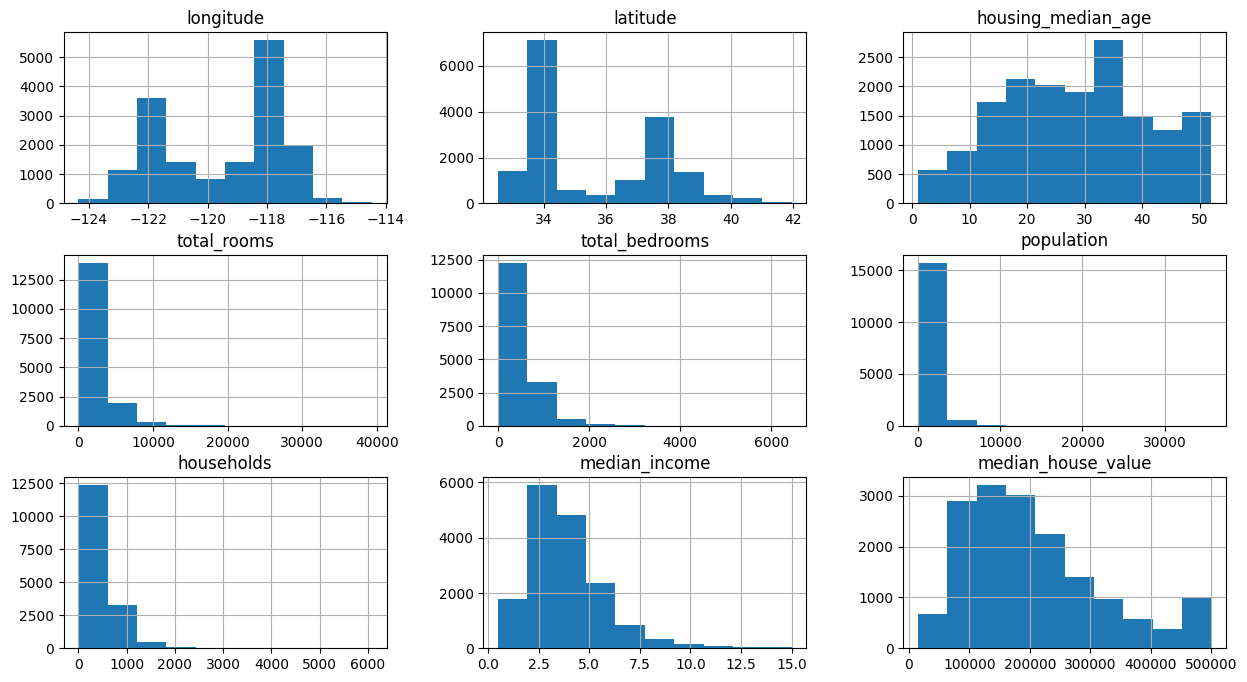

In [10]:
training_data.hist(figsize=(15,8))

In [11]:
#correlation 
#Each cell shows the correlation coefficient between the feature in that row and the feature in that column.
#Correlation values range from -1 to 1:
# 1 indicates a perfect positive correlation.
# -1 indicates a perfect negative correlation.
# 0 indicates no linear correlation.

training_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.048166
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,-0.141933
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,0.104041
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.136040
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,0.051352
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.023989
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,0.066598
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,0.688695
median_house_value,-0.048166,-0.141933,0.104041,0.136040,0.051352,-0.023989,0.066598,0.688695,1.000000


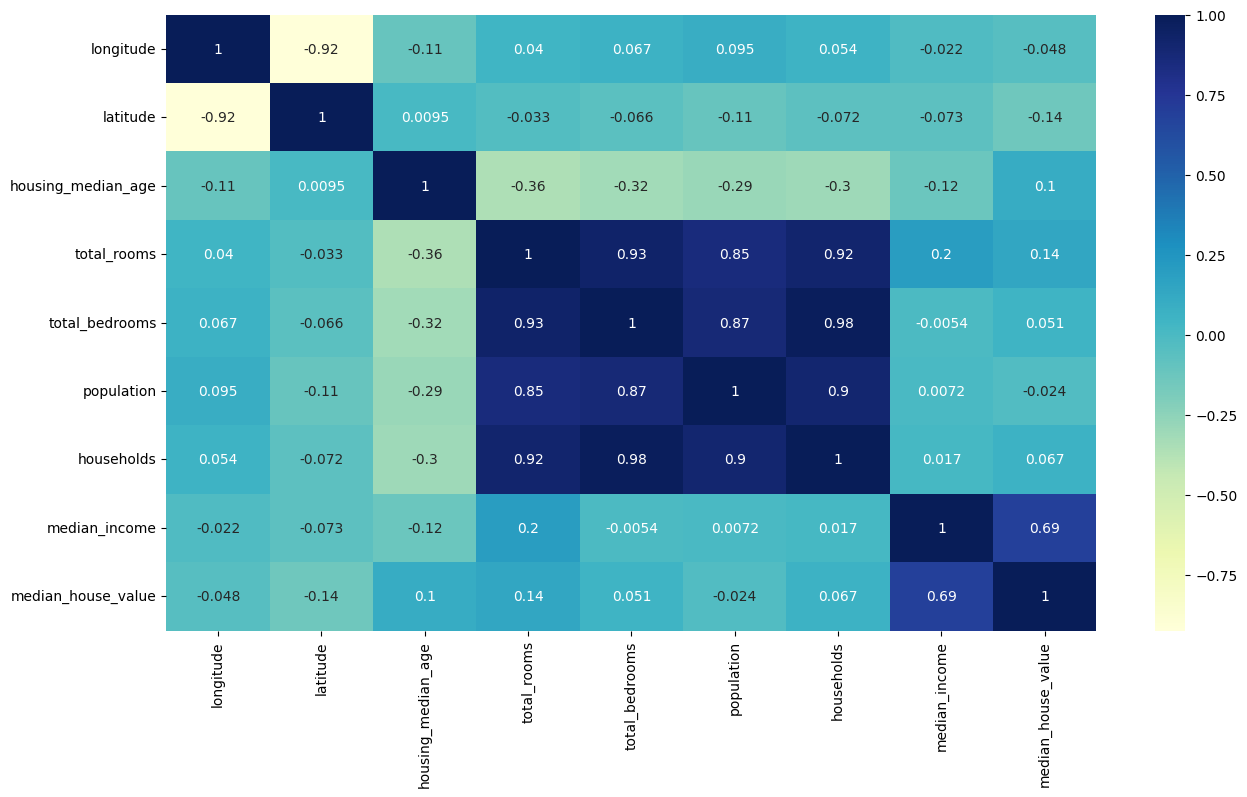

In [12]:
plt.figure(figsize=(15, 8))
#YlGnBu yellow, green and blue 
sns.heatmap(training_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.show()

In [13]:
'''
np.log() applies the natural logarithm (base e) transformation to the values in each column.
-Why this is done:
Handle skewed data → Many real-world features (like rooms, population, households) have right-skewed distributions with a long tail (a few very large values). Taking the log compresses large values and makes the distribution more normal-like.
Reduce the impact of outliers → Extremely large values won’t dominate the model after log-scaling.
Stabilize variance → Makes relationships between variables more linear, which helps linear regression and other algorithms.
Numerical stability → Adding +1 ensures we don’t try to compute log(0), which is undefined.
'''
training_data['total_rooms']=np.log(training_data['total_rooms']+1)
training_data['total_bedrooms']=np.log(training_data['total_bedrooms']+1)
training_data['population']=np.log(training_data['population']+1)
training_data['households']=np.log(training_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

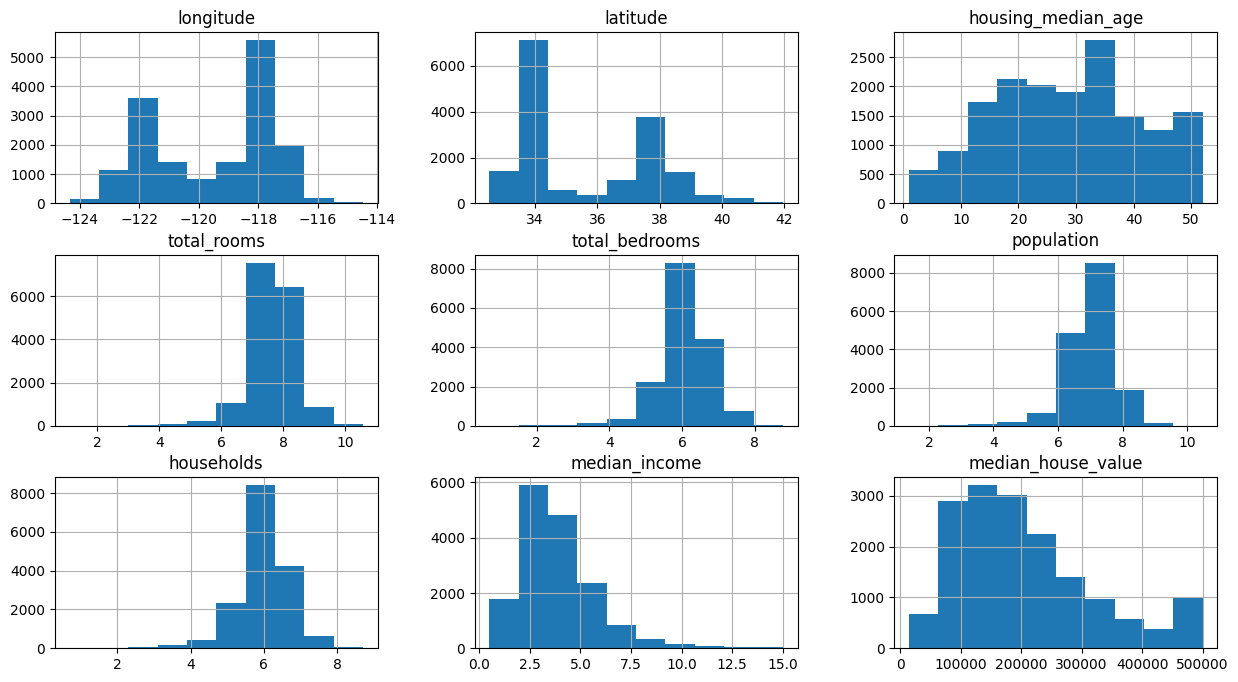

In [14]:
training_data.hist(figsize=(15,8))

In [15]:
training_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [16]:
# Create dummy variables for ocean_proximity
training_data['ocean_proximity']

17727     <1H OCEAN
2057         INLAND
6453         INLAND
4619      <1H OCEAN
15266    NEAR OCEAN
            ...    
11397     <1H OCEAN
12081     <1H OCEAN
5447      <1H OCEAN
866        NEAR BAY
15948      NEAR BAY
Name: ocean_proximity, Length: 16346, dtype: object

In [17]:
# Create dummy variables for ocean_proximity 
# problem we have string instead of number, soltion we need to encode it using get_dummies
#notice For each unique category, it creates a new binary column in the DataFrame (1H OCEAN	INLAND	ISLAND	NEAR BAY	NEAR OCEAN)
dummies = pd.get_dummies(training_data.ocean_proximity).astype(int)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,1,0,0,0,0
2057,0,1,0,0,0
6453,0,1,0,0,0
4619,1,0,0,0,0
15266,0,0,0,0,1
...,...,...,...,...,...
11397,1,0,0,0,0
12081,1,0,0,0,0
5447,1,0,0,0,0
866,0,0,0,1,0


In [18]:
#next step since we encoded the values now we need to drop the ocean_proximity and join the encoded data to our training data
training_data=training_data.join(dummies).drop(['ocean_proximity'], axis=1)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,1,0,0,0,0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,0,1,0,0,0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,0,1,0,0,0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,1,0,0,0,0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


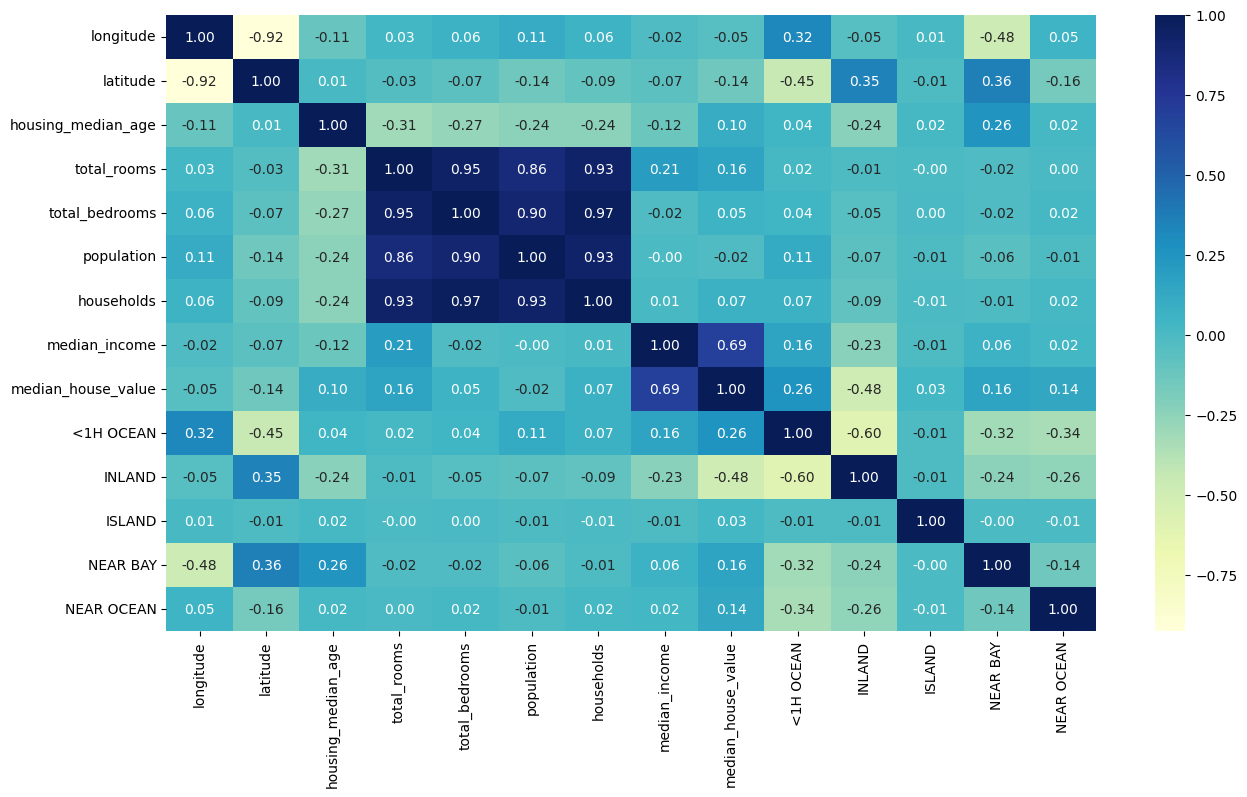

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

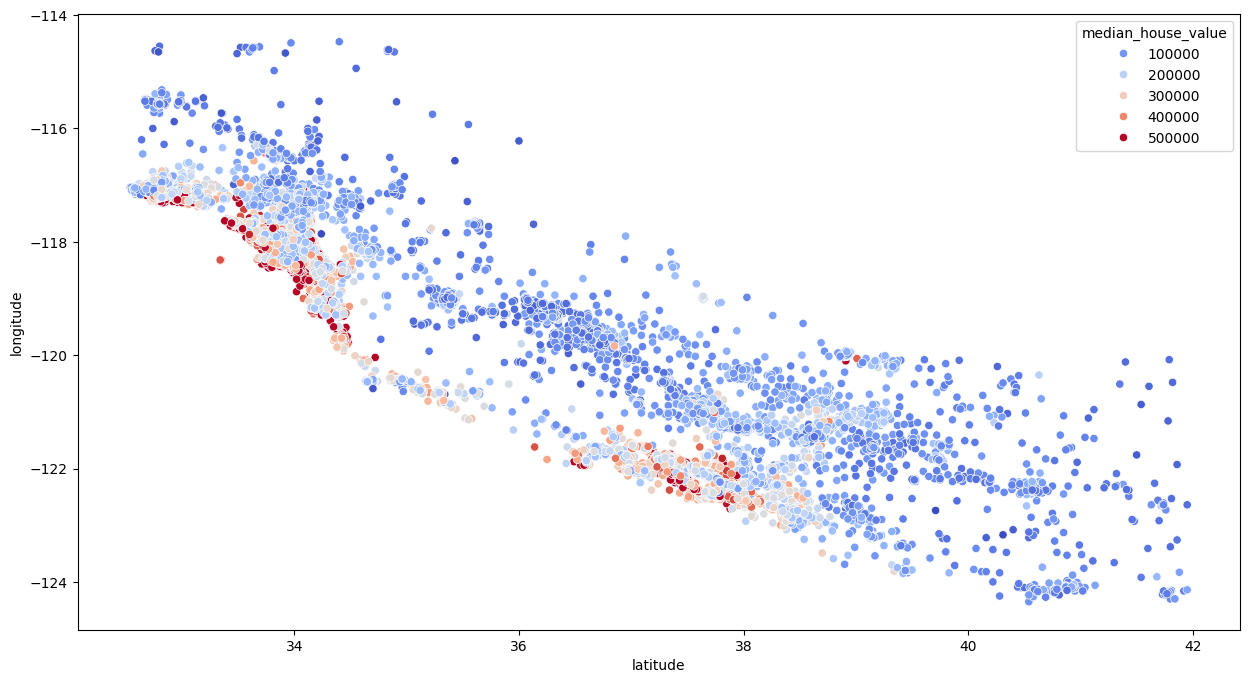

In [20]:
plt.figure(figsize=(15, 8))
#cool warm
sns.scatterplot(x="latitude", y="longitude", data=training_data, hue="median_house_value", palette="coolwarm")
plt.show()

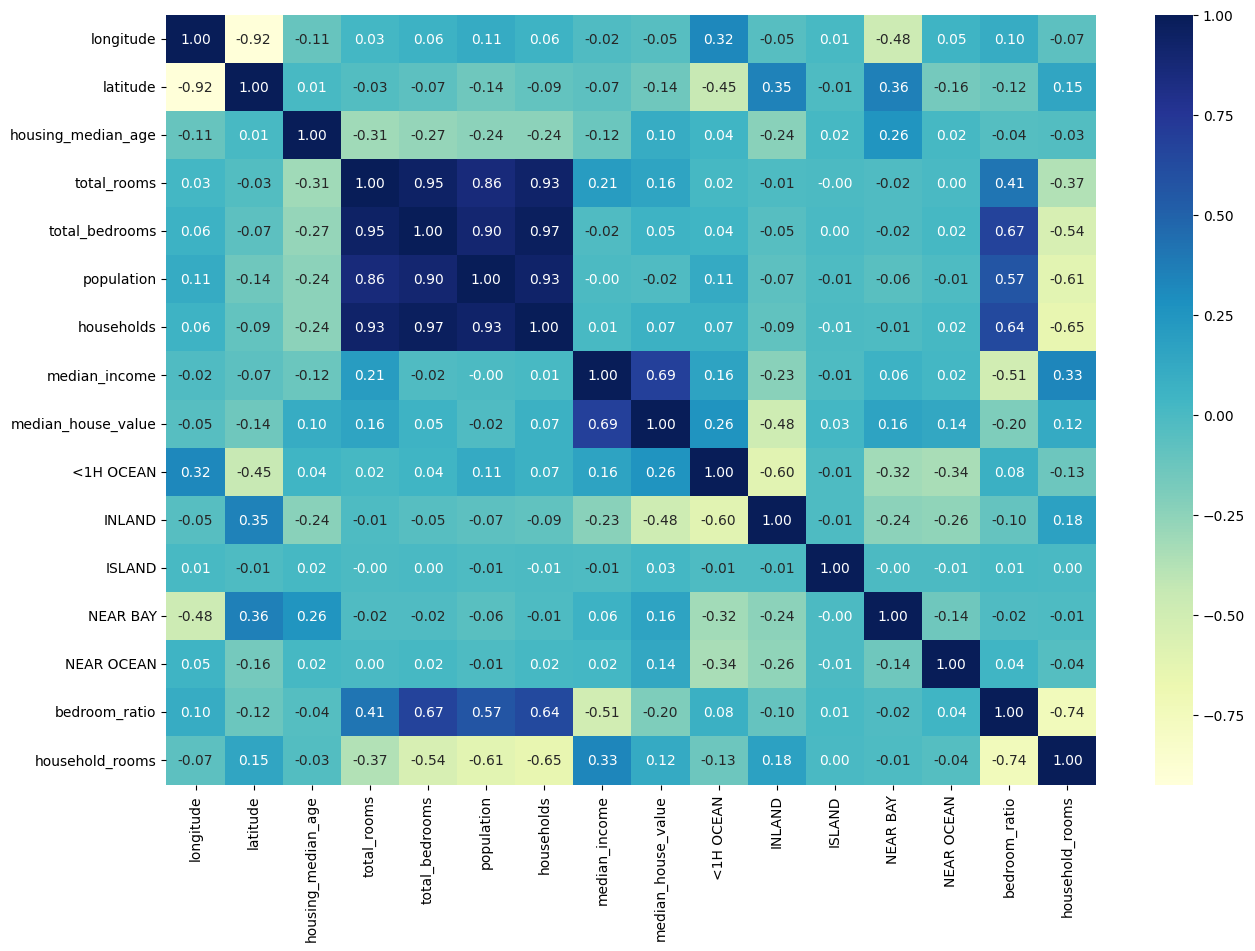

In [21]:
#The idea is that while "total rooms" and "total bedrooms" are individual features, their ratio might better indicate the type or functionality of #properties within a block (e.g., more bedrooms per room might suggest smaller, more compact living spaces or a different kind of dwelling).
#The video suggests that "total rooms" alone doesn't give the full picture if a block has many households . This new feature helps understand if the rooms # # are spread out among many small households or concentrated in fewer, larger ones, which could influence house values.

training_data['bedroom_ratio'] = training_data['total_bedrooms'] / training_data['total_rooms']
training_data['household_rooms'] = training_data['total_rooms'] / training_data['households']
plt.figure(figsize=(15, 10))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

In [22]:

x_training,y_training = training_data.drop(["median_house_value"], axis=1), training_data["median_house_value"]

model = LinearRegression()
# training the model
model.fit(x_training, y_training)

test_data = x_test.join(y_test)
# since applied these changes to our training now we have to make the same changes to our test data set
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies (test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test, y_test = test_data.drop(["median_house_value"], axis=1),test_data["median_house_value"] 
#R-squared/ coefficient of determination, value, 0.0 to 1.0: R-squared ranges from 0 to 1
model.score(x_test, y_test)

0.6687407117584971

In [23]:
scaler = StandardScaler()

# Fit scaler on X_train and transform both X_train and X_test
x_training_scaled = scaler.fit_transform(x_training)
x_test_scaled = scaler.transform(x_test)

# Now train your model using the scaled features
model = LinearRegression()
model.fit(x_training_scaled, y_training)

# Optionally evaluate
r2 = model.score(x_test_scaled, y_test)
print("R² on test set:", r2)

R² on test set: 0.6687407117584969


In [24]:
#Random Forest is a machine learning algorithm that builds many decision trees and combines their results to make more accurate and stable predictions.
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_training, y_training)
forest.score(x_test, y_test)


0.8208058885239355

In [43]:
print('Grid searching, please wait a moment......')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# --  Tuning the hyperparameters
#https://scikit-learn.org/stable/modules/ensemble.html
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

#creating default model
forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30], #This controls how many trees the Random Forest will build, a forest with 3 trees then 10, then 30
    "max_features": [2, 4, 6, 8]
    #max_features, This controls how many features (columns) the model can use when splitting nodes in each tree.
    #Smaller values → trees are more random and diverse (helping generalization).
    #Larger values → trees can capture more structure but risk overfitting.
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_training, y_training)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')
#cv=5: Uses 5-fold cross-validation, meaning the training data is split into 5 parts to test model performance
#return_train_score=True: Also keeps track of training scores for analysis

best_forest = grid_search.best_estimator_
best_forest.score(x_training, y_training #Calculates the R² (coefficient of determination) on the training set

#RandomForestRegressor(max_features=6, n_estimators=30)
#grid_search.fit(housing_prepared, housing_labels)


Grid searching, please wait a moment......


0.9719533253857048

In [44]:
# after all these work , now are going to actually save the model
import joblib

# Save the trained model to a file
joblib.dump(best_forest, "house_price_model.pkl")

print("Model saved as house_price_model.pkl")

Model saved as house_price_model.pkl
